# Autómatas Finitos
## Autómatas Finitos Deteminístas (AFD)
### Definición
Un AFD es un mecanismo teórico que permite clasificar palabras en dos lenguajes, el lenguaje de palabras aceptadas y el lenguaje de las palabras no aceptadas. 

Se parte entonces de la existencia de un conjunto de símbolos o señales que en secuencia finita, forman palabras, algunas de las cuales pueden ser aceptadas o no por cierto sistema. Un AFD es el que determina cuáles de esas palabras son aceptadas y cuáles no.

Formalmente un AFD está definido por una quíntupla de elementos:
$$AFD = \langle Q,\Sigma,q_0,A,f_t\rangle$$

donde:

- $Q=\{q_0|Q'\}$ es un conjunto no vacío de símbolos que representan los estados en los que se puede encontrar el autómata.

- $\Sigma=\{\sigma_0\vert\Sigma'\}\mid\emptyset$ es un conjunto (posiblemente vac\'io) que representa el conjunto de señanes con que el autómata es capaz de reaccionar.

- $q_0\in Q$ es un estado del autómata que sirve como estado inicial.

- $A\subseteq Q$ es un subconjunto de estados, que sirven como estados aceptores.

- $f_t:Q\times\Sigma\to Q$ es una función completa y sobreyectiva llamada función de transición.

Un AFD es finito porque $|E|<<\infty$ y $|\Sigma|<<\infty$. Por otro lado, el AFD es determinísta porque la función de transición es total y sobreyectiva, lo que garantiza que ante cualquier combinación de argumentos de entrada, siempre exista uno y sólo un elemento del codominio relacionado con la entrada.

### Representación orientada a objetos
Un AFD se modela por una clase llamada `afd%`, que tiene 5 campos (atributos en la teoría general de objetos), y corresponden exactamente a la quíntupla de definición del AFD; los métodos se irán definiendo en el desarrollo de este tema.

In [13]:
(require racket)
(require racket/list)
(define afd%
  (class object%
    (init-field ldef)
    (field [EDOS (list-ref ldef 0)]
           [ALFA (list-ref ldef 1)]
           [EINI (list-ref ldef 2)]
           [ACEP (list-ref ldef 3)]
           [FTRA (list-ref ldef 4)]
           [NAME "afd-non"]
           [GTRA 'NoDef])
    (super-new)
    (define/public (edos) EDOS)
    (define/public (alfa) ALFA)
    (define/public (eini) EINI)
    (define/public (acep) ACEP)
    (define/public (ftra) FTRA)
))

### Grafo de transiciones
- Los estados estan dibujados como círculos.
- El alfabeto proporciona los símbolos para etiquetar las flechas.
- El estado inicial es señalado por una flecha que no tiene estado inicial.
- Un estado aceptor se distingue de los demás estados por estar dibujado con un doble círculo.
- Las transiciones como flechas que indican el estado inicial y la punta de flecha indica el estado que se alcanza en la transición. Cada flecha debe estar etiquetada con un símbolo del alfabeto.

Ejemplo: Supongamos el siguiente autómata.


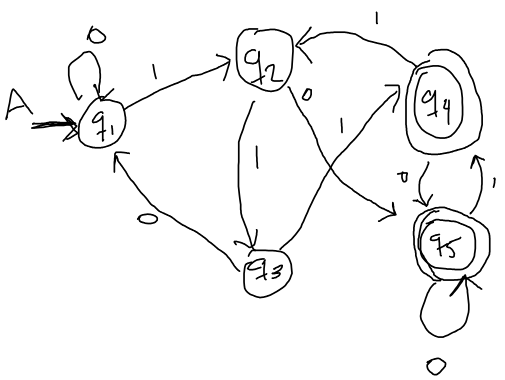

### Tabla de transiciones

La información del AFD se puede plasmar en una tabla de transiciones, poniendo cada símbolo del alfabeto encabezando una columna, y cada estado encabezando cada renglón. Se debe distinguir el estado inicial con una marca `>`; y el estado inicial con otra marca diferente, como `*`, el siguiente ejemplo ilustra el mismo autómata que en el grafo de transiciones:

|     || 0  | 1  | 
|----------------|
| >q1 || q1 | q2 |
|  q2 || q5 | q3 |
|  q3 || q1 | q4 |
| *q4 || q5 | q2 |
| *q5 || q5 | q4 |


In [22]:
(define ldefA '((q1 q2 q3 q4 q5) (0 1) q1 (q4 q5)
                                 ((q1 0 q1) (q1 1 q2) (q2 0 q5) (q2 1 q3)
                                  (q3 0 q1) (q3 1 q4) (q4 0 q5) (q4 1 q2)
                                  (q5 0 q5) (q5 1 q4))))
(define A (new afd% [ldef ldefA]))

(send A ftra)

'((q1 0 q1) (q1 1 q2) (q2 0 q5) (q2 1 q3) (q3 0 q1) (q3 1 q4) (q4 0 q5) (q4 1 q2) (q5 0 q5) (q5 1 q4))

### La función de transición de estados

La dinámica del AFD empieza con la posibilidad de cambiar entre estados a causa de una señal que percibe el autómata, o de manera equivalente, un símbolo leído por el autómata. La función de transición $\delta$, definida como una lista de transiciones solamente contiene el protocolo a seguir en cualquier caso, pero falta el mecanismo que efectivamente hace que cambie de estado. De modo que definimos $\delta$ como sigue:
$$
\delta(q,\sigma)= \mathrm{last}(\{t\in f_t\;\mid\;\langle q,\sigma\rangle = \langle t_1, t_2\rangle \})
$$

In [20]:
(define afd%
  (class object%
    (init-field ldef)
    (field [EDOS (list-ref ldef 0)]
           [ALFA (list-ref ldef 1)]
           [EINI (list-ref ldef 2)]
           [ACEP (list-ref ldef 3)]
           [FTRA (list-ref ldef 4)]
           [NAME "afd-non"]
           [GTRA 'NoDef])
    (super-new)
    (define/public (edos) EDOS)
    (define/public (alfa) ALFA)
    (define/public (eini) EINI)
    (define/public (acep) ACEP)
    (define/public (ftra) FTRA)
; -------------------------------------------------------------------------
    (define/public (f e s) 
        (caddar (filter (lambda (t) (equal? (list e s) (take t 2))) FTRA)))
; -------------------------------------------------------------------------
))

In [21]:
(define ldefA '((q1 q2 q3 q4 q5) (0 1) q1 (q4 q5)
                                 ((q1 0 q1) (q1 1 q2) (q2 0 q5) (q2 1 q3)
                                  (q3 0 q1) (q3 1 q4) (q4 0 q5) (q4 1 q2)
                                  (q5 0 q5) (q5 1 q4))))

(define A (new afd% [ldef ldefA]))

(send A f 'q4 0)

'q5

### La función de transición extendida

El siguiente paso en la dinámica del autómata, es brindarle la capacidad de analizar palabras de símbolos. Llamaremos __función de transición extendida__ a la función 
$$
\delta*:Q\times\Sigma*
$$
que a partir de un estado $q\in Q$, analiza cada símbolo de una palabra $\omega\in\Sigma*$: el autómata cambia de estado en estado (si es necesario) y devuelve el estado que fué alcanzado después de haber analizado el último símbolo de $\omega$, ese último estado lo llamaremos __estado final__.  
La función $\delta*$ es definida recursivamente como:
$$
\delta*(q,\omega)=\left\{\begin{array}{ll}
q & \mathrm{si}\;\omega=\epsilon;\\
\\
\delta*(\delta(q,\omega_0),\omega') & \mathrm{si}\;\omega=\langle\omega_0\mid\omega'\rangle.
\end{array}\right.
$$

__*nota:*__ La notación $\omega=\langle \omega_0\mid \omega'\rangle$ indica que $\omega$ es una secuencia no vacía, que tiene a $\omega_0$ como primer elemento, y a $\omega'$ como la secuencia que contiene al resto de los elementos de $\omega$.

In [24]:
(define afd%
  (class object%
    (init-field ldef)
    (field [EDOS (list-ref ldef 0)]
           [ALFA (list-ref ldef 1)]
           [EINI (list-ref ldef 2)]
           [ACEP (list-ref ldef 3)]
           [FTRA (list-ref ldef 4)]
           [NAME "afd-non"]
           [GTRA 'NoDef])
    (super-new)
    (define/public (edos) EDOS)
    (define/public (alfa) ALFA)
    (define/public (eini) EINI)
    (define/public (acep) ACEP)
    (define/public (ftra) FTRA)
    (define/public (f e s) 
        (caddar (filter (lambda (t) (equal? (list e s) (take t 2))) FTRA)))
; -------------------------------------------------------------------------------
    (define/public (f* e w)
      (if (equal? w '()) 
          e
          (f* (f e (car w)) (cdr w))))
; -------------------------------------------------------------------------------
))

(define ldefA '((q1 q2 q3 q4 q5) (0 1) q1 (q4 q5)
                                 ((q1 0 q1) (q1 1 q2) (q2 0 q5) (q2 1 q3)
                                  (q3 0 q1) (q3 1 q4) (q4 0 q5) (q4 1 q2)
                                  (q5 0 q5) (q5 1 q4))))

(define A (new afd% [ldef ldefA]))

(send A f* 'q2 '(0 1 1 1 1 0))

'q5